In [80]:
import pandas as pd           #  veri çerçeveleri (DataFrame) oluşturmak ve veri setlerini okumak için idealdir. gibi  df = pd.read_csv('data.csv')
import numpy as np            # Sayısal işlemler için
import matplotlib.pyplot as plt # Görselleştirme için grafik ve çizimler
from sklearn.cluster import KMeans # Kümeleme algoritması olarak KMeans kullanılır. Verileri belirli sayıda kümeye ayırmak için kullanılır
from sklearn.preprocessing import StandardScaler # Verilerin ölçeklendirilmesi için kullanılır. Özellikle makine öğrenimi modelleme öncesinde verileri normalize etmek için
from sklearn.model_selection import train_test_split from sklearn.model_selection import train_test_split   # Veri setini eğitim ve test olarak ayırmak için kullanılır. Modelin performansını değerlendirmek için önemlidir.
from sklearn.linear_model import LinearRegression from sklearn.linear_model import LinearRegression # Doğrusal regresyon modeli oluşturmak için kullanılır. İki veya daha fazla değişken arasındaki ilişkiyi modellemek için kullanılır.
# Örnek: model = LinearRegression(); model.fit(X_train, y_train)
#from sklearn.metrics import mean_squared_error # Modelin performansını değerlendirmek için kullanılan bir metrik. Tahminler ile gerçek değerler arasındaki hata karelerinin ortalamasını hesaplar.


In [81]:
df = pd.read_csv('data.csv', encoding='windows-1252') #dosya farklı bir kodlamada oldugu için encoding kullanmamız gerekiyor.


In [82]:
df.head()#ilk 5 satırı ve sütün bilgileri verir

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.tail() # son 5 satır ve sütün bilgileri verir

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [6]:

df.info()#genel bilgileri verir int object türler Non-Null Count: Sütunda kaç tane boş değer olmadığı bilgisi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [9]:

df.isnull().sum() #kaç tane eksik veri var toplamı

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [10]:

# Eksik değer sayısını hesaplayın
missing_values = df.isnull().sum()

# Toplam değer sayısını hesaplama
total_values = df.shape[0]

# Eksik değer oranını hesaplama
missing_percentage = (missing_values / total_values) * 100

# Sonuçları birleştirmek
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})

# Eksik değerlerin oranlarını görüntüleyin
print(missing_data)

             Missing Values  Missing Percentage
InvoiceNo                 0            0.000000
StockCode                 0            0.000000
Description            1454            0.268311
Quantity                  0            0.000000
InvoiceDate               0            0.000000
UnitPrice                 0            0.000000
CustomerID           135080           24.926694
Country                   0            0.000000


In [11]:

df['Description'].fillna('Bilinmeyen', inplace=True)
# description oldukça düşük oran oldugu için %0.27 dolurma yaptık fillna ile.

<ipython-input-11-f3a9de1f167e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna('Bilinmeyen', inplace=True)


In [12]:
df.dropna(subset=['CustomerID'], inplace=True)
#customer ıd oldukça yüksek deger var eksiklik oranı silinmesi gerekir dogru analiz için %24.93

In [13]:

df['TotalSales'] = df['Quantity'] * df['UnitPrice']
total_sales = df['TotalSales'].sum() #toplam satış miktarı


In [14]:
df.isnull().sum() #Tekrar eksik verilerin toplamını kontrol eder.

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TotalSales,0


In [15]:
df.describe().T #sayısal sütunlar hakkında hızlıca bilgi almak ve bu bilgileri daha okunabilir bir formatta sunmak için oldukça kullanışlıdır.

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0
TotalSales,406829.0,20.401854,427.591718,-168469.6,4.20,11.10,19.50,168469.6


In [16]:

# Örnek veri çerçevesi
df = pd.read_csv('data.csv', encoding='windows-1252') # Orijinal veri çerçevenizi yükleyin

# Quantity için IQR hesaplama
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Anormal değerlerin filtrelenmesi
df = df[(df['Quantity'] >= (Q1 - 1.5 * IQR)) & (df['Quantity'] <= (Q3 + 1.5 * IQR))]

# Aynı işlemi UnitPrice için de yapabilirsiniz
Q1_price = df['UnitPrice'].quantile(0.25)
Q3_price = df['UnitPrice'].quantile(0.75)
IQR_price = Q3_price - Q1_price

df = df[(df['UnitPrice'] >= (Q1_price - 1.5 * IQR_price)) & (df['UnitPrice'] <= (Q3_price + 1.5 * IQR_price))]

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,450820.0,4.768103,4.603068,-12.0,1.00,3.0,7.00,23.0
UnitPrice,450820.0,2.780913,2.040645,0.0,1.25,2.1,3.75,8.5
CustomerID,333143.0,15343.687104,1704.843207,12347.0,14040.00,15281.0,16843.00,18287.0


In [18]:
df = df[df['Quantity'] >= 0]
median_quantity = df['Quantity'].median()
df['Quantity'] = df['Quantity'].apply(lambda x: median_quantity if x < 0 else x)
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

In [19]:
df.shape

(443573, 9)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443573 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    443573 non-null  object 
 1   StockCode    443573 non-null  object 
 2   Description  443143 non-null  object 
 3   Quantity     443573 non-null  int64  
 4   InvoiceDate  443573 non-null  object 
 5   UnitPrice    443573 non-null  float64
 6   CustomerID   326468 non-null  float64
 7   Country      443573 non-null  object 
 8   TotalSales   443573 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 33.8+ MB


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,443573.0,4.902656,4.496392,1.0,1.00,3.0,8.00,23.00
UnitPrice,443573.0,2.778596,2.037977,0.0,1.25,2.1,3.75,8.50
CustomerID,326468.0,15350.899947,1703.921780,12347.0,14049.00,15296.0,16871.00,18287.00
TotalSales,443573.0,10.930331,11.814263,0.0,3.29,7.5,15.60,194.81


In [22]:
# Eksik TotalSales verilerini Quantity * UnitPrice ile hesapla
df['TotalSales'].fillna(df['Quantity'] * df['UnitPrice'], inplace=True)


<ipython-input-22-403af9a76365>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalSales'].fillna(df['Quantity'] * df['UnitPrice'], inplace=True)


In [23]:
# TotalSales için alt ve üst limit belirleyelim (1. ve 99. yüzdelik dilim)
lower_limit = df['TotalSales'].quantile(0.01)
upper_limit = df['TotalSales'].quantile(0.99)

# Dış değerleri NaN ile değiştir
df.loc[df['TotalSales'] < lower_limit, 'TotalSales'] = np.nan
df.loc[df['TotalSales'] > upper_limit, 'TotalSales'] = np.nan

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,443573.0,4.902656,4.496392,1.00,1.00,3.0,8.00,23.00
UnitPrice,443573.0,2.778596,2.037977,0.00,1.25,2.1,3.75,8.50
CustomerID,326468.0,15350.899947,1703.921780,12347.00,14049.00,15296.0,16871.00,18287.00
TotalSales,436389.0,10.288292,9.309447,0.42,3.29,7.5,15.30,59.52


In [25]:
# Sıfır birim fiyatı olan kayıtları kaldırma
df = df[df['UnitPrice'] > 0]

# Alternatif olarak, sıfır birim fiyatı olanları medyan ile değiştirme
median_unit_price = df['UnitPrice'].median()
df.loc[df['UnitPrice'] == 0, 'UnitPrice'] = median_unit_price

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,442666.0,4.904070,4.495069,1.000,1.00,3.0,8.00,23.00
UnitPrice,442666.0,2.784289,2.036175,0.001,1.25,2.1,3.75,8.50
CustomerID,326440.0,15350.977141,1703.889434,12347.000,14049.00,15296.0,16871.50,18287.00
TotalSales,436389.0,10.288292,9.309447,0.420,3.29,7.5,15.30,59.52


In [27]:
# Tarih özelliklerini çıkarma
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Weekday'] = df['InvoiceDate'].dt.weekday

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442666 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    442666 non-null  object        
 1   StockCode    442666 non-null  object        
 2   Description  442666 non-null  object        
 3   Quantity     442666 non-null  int64         
 4   InvoiceDate  442666 non-null  datetime64[ns]
 5   UnitPrice    442666 non-null  float64       
 6   CustomerID   326440 non-null  float64       
 7   Country      442666 non-null  object        
 8   TotalSales   436389 non-null  float64       
 9   Year         442666 non-null  int32         
 10  Month        442666 non-null  int32         
 11  Day          442666 non-null  int32         
 12  Weekday      442666 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(4), int64(1), object(4)
memory usage: 40.5+ MB


In [29]:
df["Description"].nunique() #kaç farklı ürün satılmış beznersiz olanların sayısını verir farklı olanların

3781

In [30]:
df["Description"].value_counts() #Hangi üründen kaç tane satıldı farklı benzersiz degerleri bulur

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,1934
JUMBO BAG RED RETROSPOT,1818
LUNCH BAG RED RETROSPOT,1457
PARTY BUNTING,1308
LUNCH BAG BLACK SKULL.,1267
...,...
PINK FEATHER CHRISTMAS DECORATION,1
WHITE FRANGIPANI HAIR CLIP,1
JARDIN ETCHED GLASS BUTTER DISH,1


In [31]:
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity",ascending=False).head(10)# sort_values sıralar azalana göre ascending=false büyükten küçüge sıralar true tam tersi
# dedigimiz agg birleştirir group by gruplar.


,Quantity
Description,
JUMBO BAG RED RETROSPOT,14046
ASSORTED COLOUR BIRD ORNAMENT,11054
WHITE HANGING HEART T-LIGHT HOLDER,10927
LUNCH BAG RED RETROSPOT,10519
LUNCH BAG BLACK SKULL.,8208
LUNCH BAG CARS BLUE,7928
JAM MAKING SET PRINTED,7658
JUMBO BAG PINK POLKADOT,7453
LUNCH BAG APPLE DESIGN,7433


In [32]:
df.groupby("Description").agg({"Quantity":"sum"})

,Quantity
Description,
4 PURPLE FLOCK DINNER CANDLES,144
50'S CHRISTMAS GIFT BAG LARGE,1191
DOLLY GIRL BEAKER,959
I LOVE LONDON MINI BACKPACK,249
I LOVE LONDON MINI RUCKSACK,1
...,...
ZINC T-LIGHT HOLDER STARS LARGE,24
ZINC T-LIGHT HOLDER STARS SMALL,1952
ZINC WILLIE WINKIE CANDLE STICK,1722


In [33]:
df.groupby(["Country","Description"]).agg({"Quantity":"sum"})#country ve description sütüna göre gruplama yapar ve Quantity deki sütunun degerlerini toplar

Quantity
Country     Description                                 
Australia    I LOVE LONDON MINI BACKPACK               4
            12 PENCILS TALL TUBE POSY                 12
            12 PENCILS TALL TUBE RED RETROSPOT        12
            3 HOOK HANGER MAGIC GARDEN                12
            3 STRIPEY MICE FELTCRAFT                   1
...                                                  ...
Unspecified WOODEN BOX OF DOMINOES                    24
            WOODEN HAPPY BIRTHDAY GARLAND              7
            WOODEN PICTURE FRAME WHITE FINISH          6
            WOODEN UNION JACK BUNTING                  1
            ZINC METAL HEART DECORATION                2

[15910 rows x 1 columns]

In [34]:
df["Country"].nunique() # kaç ülke var

38

In [35]:
df["InvoiceNo"].nunique() # toplam kesilen faturalar no ile

17944

In [36]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
total_sales = df['TotalSales'].sum() #toplam satış miktarı

In [37]:

print(f"Toplam Satış Miktarı: {total_sales}")

Toplam Satış Miktarı: 4848399.824000001


In [38]:

average_price = df['UnitPrice'].mean()
print(f"ortalama fiyat:{average_price}")

ortalama fiyat:2.784288773025261


In [39]:

total_customers = df['CustomerID'].nunique()  # toplam farklı müşteri sayıları
print(f"toplam farklı müşteri sayısı:{total_customers}")

toplam farklı müşteri sayısı:4170


In [40]:
df["InvoiceNo"].str.contains("C") #"A" harfi normal satış faturaları,C harfi iade R harfi reklamasyon faturaları
# true iade olanlar false iaede olmayanlar.

,InvoiceNo
0,False
1,False
2,False
3,False
4,False
...,...
541904,False
541905,False
541906,False
541907,False


In [41]:

df["InvoiceNo"].str.contains("A") # normal satış faturaları yoktur A false dedigi için.

,InvoiceNo
0,False
1,False
2,False
3,False
4,False
...,...
541904,False
541905,False
541906,False
541907,False


In [42]:
df["InvoiceNo"].str.contains("C").sum() #iade sayısının toplamları

0

In [43]:
df=df[~(df["InvoiceNo"].str.contains("C",na=False))] #na=False parametresi eğer InvoiceNo sütunundaki bir değer NaN ise bu değerin False olarak gösterir


In [44]:

df["InvoiceDate"].max() #ınvoiecede en büyük tarih

Timestamp('2011-12-09 12:50:00')

In [45]:


df["InvoiceDate"].max() #ınvoiecede en büyük tarih


Timestamp('2011-12-09 12:50:00')

In [46]:
##bir tarih verisi oluşturalım
##dt.datetime(yyyy,aa,gg) Yıl Ay ve Hafta bazında incelemek için veri setinden aralık seçiyoruz.
import datetime as dt
today_date=dt.date(2011,12,10)
formatted_date = today_date.strftime('%Y-%m-%d')

In [47]:
type(today_date) # veri türü inceleme

datetime.date

In [48]:
today_date

datetime.date(2011, 12, 10)

In [49]:
yearly_sales = df.resample('Y', on='InvoiceDate')['TotalSales'].sum()
print("Yıl Bazında Satışlar:")
print(yearly_sales)


Yıl Bazında Satışlar:
InvoiceDate
2010-12-31     370264.710
2011-12-31    4478135.114
Freq: YE-DEC, Name: TotalSales, dtype: float64


<ipython-input-49-d22f9cbf1644>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sales = df.resample('Y', on='InvoiceDate')['TotalSales'].sum()


In [52]:

# Ay bazında toplam satış miktarı
monthly_sales = df.resample('M', on='InvoiceDate').sum() # Ay bazında gruplar M
print("Ay Bazında Satışlar:")
print(monthly_sales)


<ipython-input-52-ff3061dd17d4>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='InvoiceDate').sum() # Ay bazında gruplar M


Ay Bazında Satışlar:
                                                     InvoiceNo  \
InvoiceDate                                                      
2010-12-31   5363655363655363655363655363655363655363655363...   
2011-01-31   5399935399935399935399935399935399935399935399...   
2011-02-28   5427765427765427765427765427765427765427765427...   
2011-03-31   5452205452205452205452205452205452205452205452...   
2011-04-30   5485505485505485505485505485505485505485505485...   
2011-05-31   5515155515155515155515155515155515165515165515...   
2011-06-30   5551565551575551575551575551575551575551575551...   
2011-07-31   5586385586385586385586385586385586385586385586...   
2011-08-31   5619055619055619055619055619055619055619055619...   
2011-09-30   5650805650825650825650835650835650835650835650...   
2011-10-31   5692035692045692045692045692045692045692045692...   
2011-11-30   5737445737445737445737445737445737445737445737...   
2011-12-31   579899579899579899579899579899579899579899

In [53]:

# Hafta bazında toplam satış miktarı
weekly_sales = df.resample('W', on='InvoiceDate').sum()
print("Hafta Bazında Satışlar:")
print(weekly_sales)


Hafta Bazında Satışlar:
                                                     InvoiceNo  \
InvoiceDate                                                      
2010-12-05   5363655363655363655363655363655363655363655363...   
2010-12-12   5372265372265372265372265372265372265372265372...   
2010-12-19   5385215385215385215385215385215385215385215385...   
2010-12-26   5394875394875394875394875394875394875394875394...   
2011-01-02                                                   0   
2011-01-09   5399935399935399935399935399935399935399935399...   
2011-01-16   5405505405505405505405505405505405505405505405...   
2011-01-23   5412675412675412675412675412675412675412675412...   
2011-01-30   5418665418665418665418665418665418665418665418...   
2011-02-06   5426205426205426205426205426205426205426205426...   
2011-02-13   5432835432835432835432845432845432845432845432...   
2011-02-20   5438215438215438215438215438215438215438215438...   
2011-02-27   544468544468544468544468544468544468544

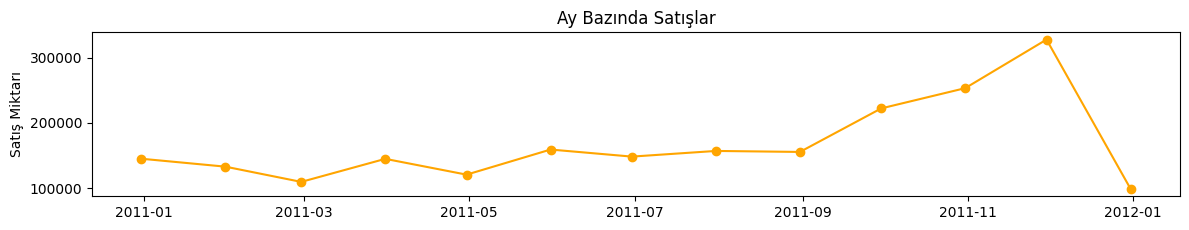

In [55]:

# Ay bazında M Ay demek
# Görselleştirme
plt.figure(figsize=(12, 6)) # Grafik boyutunu ayarlar.
plt.subplot(3, 1, 2)  # Alt grafik oluşturur 3 satırlı 1 sütunlu 1 düzen oluşturur.
plt.plot(monthly_sales.index, monthly_sales['Quantity'], marker='o', color='orange') # veri çerçevesinin tarih satış miktarlarını Quantity kullanarak bir çizgi grafiği çizer. marker='o' ifadesi, veri noktalarının üzerinde daire işareti göstermesini sağlar.
plt.title('Ay Bazında Satışlar')  # Başlık ekler grafige
plt.ylabel('Satış Miktarı') # y eksenine satış miktarı etiketini ekler

plt.tight_layout() # alt grafikler ve etiketlerin düzenin optimize eder.
plt.show() # grafigi ekranda gösterir.



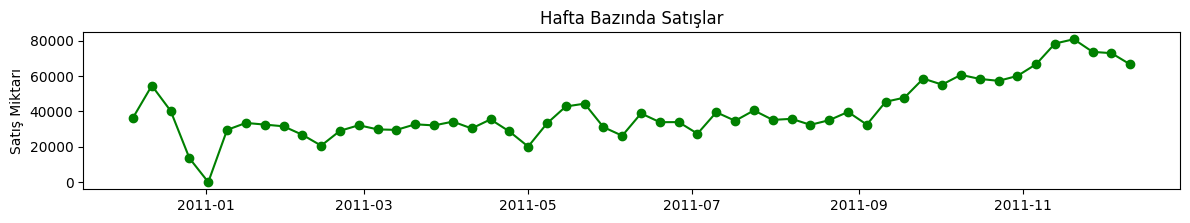

In [57]:

# Hafta bazında W hafta demek
# Görselleştirme
plt.figure(figsize=(12, 6)) # grafik boyutunu ayarlar
plt.subplot(3, 1, 3) # alt grafik oluşturur
plt.plot(weekly_sales.index, weekly_sales['Quantity'], marker='o', color='green')
plt.title('Hafta Bazında Satışlar') # grafige başlık ekler
plt.ylabel('Satış Miktarı')
plt.tight_layout() # Alt grafiklerin düzenini optimize eder, böylece etiketler ve alt grafikler birbirine çarpmaz.
plt.show()


In [58]:

df = pd.read_csv('data.csv', encoding='windows-1252')

df.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:

#InvoiceNo: Fatura numarası
#StockCode: Ürün kodu
#Description: Ürün açıklaması özellikleri ürün nedir
#Quantity: Satılan ürün miktarı
#InvoiceDate: Satış tarihi
#UnitPrice: Ürünün birim fiyatı
#CustomerID: Müşteri ID'si
#Country: Müşterinin bulunduğu ülke


In [73]:
# Negatif değerleri sıfıra ayarlama
df['Quantity'] = df['Quantity'].apply(lambda x: x if x > 0 else 0)

# Sonuçları göster
print(df)

  StockCode  Quantity
0     22197     56450
1     84077     53847
2    85099B     47363
3    85123A     38830
4     84879     36221
5   79323LP         0
6    79323W         0
7    72140F         0
8     23003         0
9     23005         0


In [74]:
# En çok satılan ürünler
top_selling_products = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)
print("En Çok Satılan Ürünler:")
print(top_selling_products)

En Çok Satılan Ürünler:
StockCode
22197      56450
84077      53847
85099B     47363
85123A     38830
84879      36221
23003          0
23005          0
72140F         0
79323LP        0
79323W         0
Name: Quantity, dtype: int64


In [84]:
# Ürün açıklamaları ve satış miktarına göre sıralama
print("En çok satılan ürünler:")
most_sold_products = df.groupby('Description').agg({
    'Quantity': 'sum'  # Toplam satılan miktar
}).reset_index()

# En çok satılan ürünleri miktara göre azalan sırada sıralama
most_sold_products = most_sold_products.sort_values(by='Quantity', ascending=False)

# En çok satılan 10 ürün
top_10_products = most_sold_products.head(10)

# En çok satılan ürünlerin isimlerini ve miktarlarını yazdırma
print(top_10_products[['Description', 'Quantity']])


En çok satılan ürünler:
                             Description  Quantity
4009   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
1866             JUMBO BAG RED RETROSPOT     47363
244        ASSORTED COLOUR BIRD ORNAMENT     36381
2740                      POPCORN HOLDER     36334
2395     PACK OF 72 RETROSPOT CAKE CASES     36039
3918  WHITE HANGING HEART T-LIGHT HOLDER     35317
2803                  RABBIT NIGHT LIGHT     30680
2161             MINI PAINT SET VINTAGE      26437
2361          PACK OF 12 LONDON TISSUES      26315
2393  PACK OF 60 PINK PAISLEY CAKE CASES     24753


In [91]:
# Negatif gelirleri hariç tutarak en çok kazandıran ürünleri hesaplamak
top_categories_revenue = df[df['TotalRevenue'] > 0].groupby('Description')['TotalRevenue'].sum().sort_values(ascending=False)

print("En Çok Kazandıran Ürün Kategorileri:")
print(top_categories_revenue)


En Çok Kazandıran Ürün Kategorileri:
Description
DOTCOM POSTAGE                        206248.770
REGENCY CAKESTAND 3 TIER              174484.740
PAPER CRAFT , LITTLE BIRDIE           168469.600
WHITE HANGING HEART T-LIGHT HOLDER    106292.770
PARTY BUNTING                          99504.330
                                         ...    
PINK CRYSTAL GUITAR PHONE CHARM            0.850
VINTAGE BLUE TINSEL REEL                   0.840
SET 12 COLOURING PENCILS DOILEY            0.650
HEN HOUSE W CHICK IN NEST                  0.420
PADS TO MATCH ALL CUSHIONS                 0.003
Name: TotalRevenue, Length: 4026, dtype: float64


In [93]:


# En çok kazandıran ürün kategorileri
top_categories_revenue = df.groupby('Description')['TotalRevenue'].sum().sort_values(ascending=False).head(10)

print("En Çok Kazandıran ilk 10 Ürün Kategorileri:")
print(top_categories_revenue)


En Çok Kazandıran ilk 10 Ürün Kategorileri:
Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED COLOUR BIRD ORNAMENT          58959.73
CHILLI LIGHTS                          53768.06
Name: TotalRevenue, dtype: float64


In [94]:

# Ürün başına düşen ortalama gelir
average_revenue_per_product = df.groupby('Description')['TotalRevenue'].mean()
print("Ürün Başına Düşen Ortalama Gelir:")
print(average_revenue_per_product)


Ürün Başına Düşen Ortalama Gelir:
Description
 4 PURPLE FLOCK DINNER CANDLES     7.092683
 50'S CHRISTMAS GIFT BAG LARGE    18.008692
 DOLLY GIRL BEAKER                15.925414
 I LOVE LONDON MINI BACKPACK      18.501932
 I LOVE LONDON MINI RUCKSACK       4.150000
                                    ...    
wrongly marked carton 22804        0.000000
wrongly marked. 23343 in box       0.000000
wrongly sold (22719) barcode       0.000000
wrongly sold as sets               0.000000
wrongly sold sets                  0.000000
Name: TotalRevenue, Length: 4223, dtype: float64


In [95]:


# Müşteri başına toplam harcama ve alışveriş sayısı hesaplama
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']  # Toplam harcamayı hesapla
customer_data = df.groupby('CustomerID').agg({
    'TotalRevenue': 'sum',       # Toplam harcama
    'InvoiceNo': 'nunique',      # Toplam alışveriş sayısı (fatura sayısı)
    'Quantity': 'sum'            # Toplam alınan ürün sayısı
}).reset_index()

# Müşteri gruplarını tanımlama (örneğin, Toplam Harcama'ya göre segmentler)
customer_data['SpendingCategory'] = pd.cut(customer_data['TotalRevenue'],
                                           bins=[0, 1000, 5000, 10000, float('inf')],
                                           labels=['Low', 'Medium', 'High', 'Very High'])

print(customer_data.head())  # Müşteri başına harcama ve segment gösterimi

   CustomerID  TotalRevenue  InvoiceNo  Quantity SpendingCategory
0     12346.0          0.00          2         0              NaN
1     12347.0       4310.00          7      2458           Medium
2     12348.0       1797.24          4      2341           Medium
3     12349.0       1757.55          1       631           Medium
4     12350.0        334.40          1       197              Low


In [98]:
# Ürün kategorilerine göre popülerlik (toplam satış miktarı ve toplam gelir)
product_data = df.groupby('StockCode').agg({
    'Description': 'first',      # Ürün açıklaması (kategori)
    'Quantity': 'sum',           # Toplam ürün miktarı
    'TotalRevenue': 'sum'        # Toplam gelir
}).reset_index()

# Ürünleri popülerlik sırasına göre sıralama: İlk önce Quantity, sonra TotalRevenue
product_data = product_data.sort_values(by=['Quantity', 'TotalRevenue'], ascending=False)

# En popüler 10 ürünü gösterme
top_10_products = product_data.head(10)

# En popüler ürünlerin detayları
print("En Popüler 10 Ürün ve Satış Miktarları:")
print(top_10_products[['Description', 'Quantity', 'TotalRevenue']])


En Popüler 10 Ürün ve Satış Miktarları:
                             Description  Quantity  TotalRevenue
1147                SMALL POPCORN HOLDER     56450      50987.47
2997   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847      13587.93
3515             JUMBO BAG RED RETROSPOT     47363      92356.03
3536  WHITE HANGING HEART T-LIGHT HOLDER     38830      97894.50
3305       ASSORTED COLOUR BIRD ORNAMENT     36221      58959.73
454      PACK OF 72 RETROSPOT CAKE CASES     36039      21059.72
1982                  RABBIT NIGHT LIGHT     30646      66756.59
1412             MINI PAINT SET VINTAGE      26437      16810.42
1530          PACK OF 12 LONDON TISSUES      26315       7972.76
966   PACK OF 60 PINK PAISLEY CAKE CASES     24753      12189.47


In [100]:
# Negatif değerleri hariç tutarak en az satılan ürünleri sıralama
least_selling_products = df[df['Quantity'] > 0].groupby('StockCode')['Quantity'].sum().sort_values(ascending=True)

print("En Az Satılan Ürünler:")
print(least_selling_products)


En Az Satılan Ürünler:
StockCode
m             1
35609A        1
35600A        1
84550         1
84569C        1
          ...  
85099B    48478
84077     55047
22197     56921
23166     78033
23843     80995
Name: Quantity, Length: 3941, dtype: int64


In [102]:
# Negatif değerleri hariç tutarak en az satılan ürün kategorilerini sıralama
least_selling_categories = df[df['Quantity'] > 0].groupby('Description')['Quantity'].sum().sort_values(ascending=True)

print("En Az Satılan Ürün Kategorileri:")
print(least_selling_categories)


En Az Satılan Ürün Kategorileri:
Description
CAPIZ CHANDELIER                          1
CROCHET LILAC/RED BEAR KEYRING            1
ORANGE/FUSCHIA STONES NECKLACE            1
ORANGE FELT VASE + FLOWERS                1
BLUE DROP EARRINGS W BEAD CLUSTER         1
                                      ...  
WHITE HANGING HEART T-LIGHT HOLDER    37895
JUMBO BAG RED RETROSPOT               48478
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
MEDIUM CERAMIC TOP STORAGE JAR        78033
PAPER CRAFT , LITTLE BIRDIE           80995
Name: Quantity, Length: 4077, dtype: int64


In [103]:

# Toplam gelir hesaplama
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice'] # Birim fiyat ile miktar çarpılı toplam gelir elde edilir.Satılan miktar ve birim fiyatı

In [104]:


# Her müşteri için toplam harcama hesaplama
customer_spending = df.groupby('CustomerID')['TotalRevenue'].sum().reset_index() #Gruplama sonrası elde edilen veri çerçevesinde, CustomerID genellikle indeks olarak atanır.
#.reset_index() ile bu indeks sıfırlanır ve CustomerID yeniden bir sütun haline gelir. Bu, veri çerçevesini daha okunabilir kılar veri analizine kolaylık saglar herhangi sütün gruplamasında kullanılabilir.


In [105]:

print(customer_spending)


      CustomerID  TotalRevenue
0        12346.0          0.00
1        12347.0       4310.00
2        12348.0       1797.24
3        12349.0       1757.55
4        12350.0        334.40
...          ...           ...
4367     18280.0        180.60
4368     18281.0         80.82
4369     18282.0        176.60
4370     18283.0       2094.88
4371     18287.0       1837.28

[4372 rows x 2 columns]


In [106]:

# Müşteri harcama verilerini standartlaştırma
scaler = StandardScaler()
customer_spending_scaled = scaler.fit_transform(customer_spending[['TotalRevenue']])



In [107]:

# K-Means ile segmentasyon
kmeans = KMeans(n_clusters=2, random_state=0)  # 2 segment oluşturuyoruz
customer_spending['Segment'] = kmeans.fit_predict(customer_spending_scaled)

In [108]:

# Segmentlerin analiz edilmesi 0 1 müşteri grupları
segment_summary = customer_spending.groupby('Segment')['TotalRevenue'].sum().reset_index()
print("\nMüşteri Segmentleri ve Toplam Harcama:")
print(segment_summary)


Müşteri Segmentleri ve Toplam Harcama:
   Segment  TotalRevenue
0        0   7206973.924
1        1   1093091.890


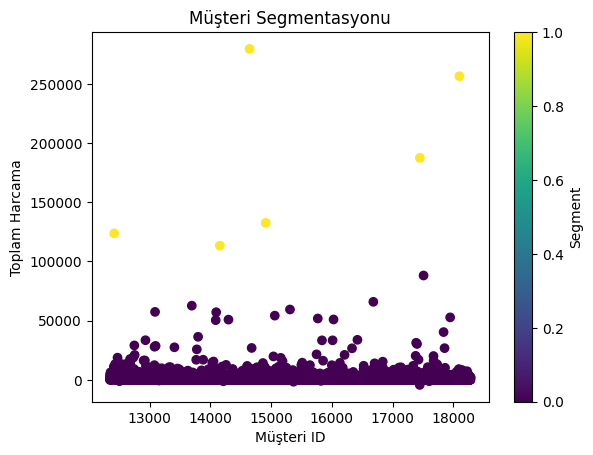

In [110]:

# Segmentlere göre görselleştirme
plt.scatter(customer_spending['CustomerID'], customer_spending['TotalRevenue'], c=customer_spending['Segment'], cmap='viridis')
plt.title('Müşteri Segmentasyonu')
plt.xlabel('Müşteri ID') #
plt.ylabel('Toplam Harcama')
plt.colorbar(label='Segment') # Renk çubuğunu ekleyerek segmentleri açıklamak için bir açıklayıcı ekler. Bu, grafikte kullanılan renklerin hangi segmentleri temsil ettiğini gösterir.
plt.show()

In [111]:




# InvoiceDate sütununu datetime formatına dönüştürme çünkü InvoiceDate yıl ve ay için datetime formatın dönüştürülmesi gerekiyor hata verir kod yoksa.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) # sütünları datetime formatına dönüştürür tarih zaman ay da hata yapmaması için

#   yıl ve ayı çıkarmak
df['Year'] = df['InvoiceDate'].dt.year # sütunundan yıl bilgisini çıkarır ve yeni bir Year sütununa atar. Bu, veri analizi ve görselleştirme sırasında yıl bazında gruplama yapmamız için önemlidir
df['Month'] = df['InvoiceDate'].dt.month # sütunundan ay bilgisini çıkarır ve yeni bir Month sütununa atar. Bu da ay bazında gruplama ve analiz yapmanızı sağlar.

print(df)
# Satışların analizini yapabilmek ve görselleştirme yapabilmek için önemlidir.Fatura tarih ile ilgili oldugu için bu işlemler gereklidir.
#InvoiceDate sütununu doğrudan datetime formatına dönüştürmek yeterli olucak ve ay gün yıl gibi gruplamaları çıkarmak yeterlidir.


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0     

In [112]:


# Özellik ve hedef değişkeni tanımlama regresyon modeli için tarih ay yıl önemlidir.
from sklearn.model_selection import train_test_split


X = df[['Year', 'Month']]
y = df['TotalRevenue']

# Veri setine ögretmek egitim ve test olarak  y hedef X denemesidir.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)# random_state=0:her çalıştırmada farklı bölünme elde edilmemesi için için yazılır ve veri setini aynı şekilde böler.
#(X_train, y_train): Modeli eğitir Model bu verilerle öğrenir ve parametrelerini ayarlar.
# y_test tahminlerin dogrulunu degerlendirir X_test bagımsız verilerden tahminler yapar
#y_train y_test bilinen hedeflerdir tahmin edmeye çalıştıgı veriler ise X_train X_test kullanılır.

In [113]:

# Kullanıcagımız Modeli tanımlama ve eğitmemiz gerekiyor hangi model olucagı önemlidir
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [114]:

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

In [115]:

# Modelin tahmin performansını değerlendirme
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 68049.85454312392


In [116]:
# Gelecek tahminleri için özellikler oluşturma
future_dates = pd.date_range(start='2012-01-01', periods=12, freq='M') # freq tarihlerin sıklıgı
future_data = pd.DataFrame({'InvoiceDate': future_dates})
future_data['Year'] = future_data['InvoiceDate'].dt.year # Yıl ve Ay bilgileri ekler gelecek için
future_data['Month'] = future_data['InvoiceDate'].dt.month

<ipython-input-116-86f9680711e5>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2012-01-01', periods=12, freq='M') # freq tarihlerin sıklıgı


In [117]:
# Gelecek tahminleri
future_X = future_data[['Year', 'Month']]
future_predictions = model.predict(future_X)

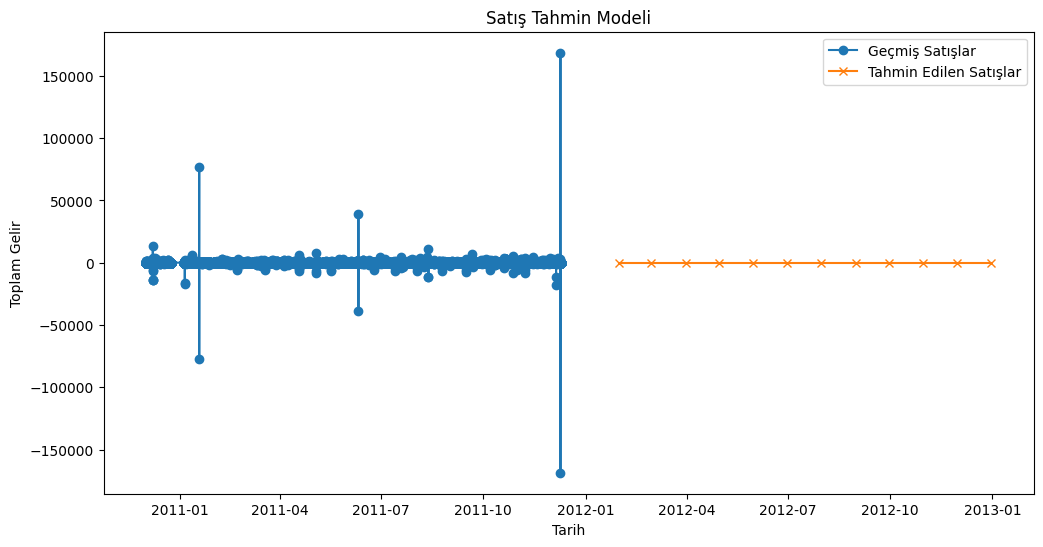

In [118]:
# Sonuçları görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(df['InvoiceDate'], df['TotalRevenue'], label='Geçmiş Satışlar', marker='o')
plt.plot(future_dates, future_predictions, label='Tahmin Edilen Satışlar', marker='x')
plt.title('Satış Tahmin Modeli')
plt.xlabel('Tarih')
plt.ylabel('Toplam Gelir')
plt.legend()
plt.show()


In [119]:

# NumPurchases sütununu hesaplama (toplam satın alma sayısı)

df['NumPurchases'] = df['Quantity']



In [120]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X, K-Means için kullanılan özellikler



In [121]:

# K-Means ile segmentasyon
kmeans = KMeans(n_clusters=3, random_state=0)  # 3 segment oluşturuyoruz
df['Segment'] = kmeans.fit_predict(X_scaled)

In [122]:

# Sonuçları yazdırma
print("Müşteri Segmentleri:")
print(df)

Müşteri Segmentleri:
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID     

In [123]:

# Sonuçları yazdırma
print("Müşteri Segmentleri:")
print(df)

Müşteri Segmentleri:
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID     

In [124]:

# Özellikler ve hedef değişkenler
X = df[['Quantity', 'UnitPrice', 'NumPurchases']]
y_regression = df['TotalRevenue']  # Regresyon için hedef
y_classification = df['Segment']    # Sınıflandırma için hedef

In [125]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)


In [126]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğitme
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

# Tahmin yapma
y_pred_reg = model_reg.predict(X_test)

# Regresyon metriklerini hesaplama
rmse = mean_squared_error(y_test, y_pred_reg, squared=False)
mae = mean_absolute_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)

print(f'Regresyon Metrikleri:\nRMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}')

Regresyon Metrikleri:
RMSE: 224.82, MAE: 17.43, R²: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [127]:
# Eğitim setinden gelen sütun adlarını yazdırın
print(X_train.columns)

# Test setinde hangi sütunlar olduğunu kontrol edin
print(X_test.columns)

# Eşleşmeyen sütunları bulma
missing_in_test = X_train.columns.difference(X_test.columns)
missing_in_train = X_test.columns.difference(X_train.columns)

print("Eğitim setinde olup test setinde olmayan sütunlar:", missing_in_test)
print("Test setinde olup eğitim setinde olmayan sütunlar:", missing_in_train)


Index(['Quantity', 'UnitPrice', 'NumPurchases'], dtype='object')
Index(['Quantity', 'UnitPrice', 'NumPurchases'], dtype='object')
Eğitim setinde olup test setinde olmayan sütunlar: Index([], dtype='object')
Test setinde olup eğitim setinde olmayan sütunlar: Index([], dtype='object')


In [128]:

# Eğitim ve test setindeki sütun adlarını yazdırma
print("Eğitim seti sütunları:", X_train.columns.tolist())
print("Test seti sütunları:", X_test.columns.tolist())


Eğitim seti sütunları: ['Quantity', 'UnitPrice', 'NumPurchases']
Test seti sütunları: ['Quantity', 'UnitPrice', 'NumPurchases']


In [129]:
from sklearn.model_selection import train_test_split



# Veri setini train ve test olarak bölelim (Örnek: %80 train, %20 test).
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

# Oluşturulan veri setlerini CSV dosyaları olarak kaydediyoruz.
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)

print("X_train.csv ve X_test.csv dosyaları oluşturuldu ve kaydedildi.")


X_train.csv ve X_test.csv dosyaları oluşturuldu ve kaydedildi.


In [130]:

# X_train ve X_test veri setlerini yüklüyoruz.
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')

# Yüklenen veri setlerinin ilk birkaç satırını kontrol ediyoruz.
print("X_train ilk satırlar:")
print(X_train.head())

print("\nX_test ilk satırlar:")
print(X_test.head())


X_train ilk satırlar:
  InvoiceNo StockCode                     Description  Quantity  \
0    573745     22138   BAKING SET 9 PIECE RETROSPOT          6   
1    562670     22791    T-LIGHT GLASS FLUTED ANTIQUE        12   
2    541604    51014L          FEATHER PEN,LIGHT PINK        24   
3    551855     22622  BOX OF VINTAGE ALPHABET BLOCKS         2   
4    561474     22384         LUNCH BAG PINK POLKADOT       100   

           InvoiceDate  UnitPrice  CustomerID         Country  TotalRevenue  \
0  2011-11-01 08:53:00       4.95     17419.0  United Kingdom          29.7   
1  2011-08-08 13:42:00       1.25     14911.0            EIRE          15.0   
2  2011-01-19 17:23:00       0.85     14572.0  United Kingdom          20.4   
3  2011-05-04 15:08:00      11.95     12836.0  United Kingdom          23.9   
4  2011-07-27 13:18:00       1.45     14680.0  United Kingdom         145.0   

   Year  Month  NumPurchases  Segment  
0  2011     11             6        0  
1  2011      8      

In [131]:

# Eğer 'InvoiceDate' sütunu X_train veya X_test içinde yoksa, orijinal veriden ekliyoruz.Eksik bir sütunun eklenmesi, tarih formatına dönüştürülmesi ve bu tarihten ay ve yıl bilgilerinin çıkarılmasını yaptık
if 'InvoiceDate' not in X_train.columns:
    X_train = X_train.merge(data[['InvoiceDate']], left_index=True, right_index=True, how='left')

if 'InvoiceDate' not in X_test.columns:
    X_test = X_test.merge(data[['InvoiceDate']], left_index=True, right_index=True, how='left')

# 'InvoiceDate' sütununu datetime formatına dönüştürüyoruz.
X_train['InvoiceDate'] = pd.to_datetime(X_train['InvoiceDate'], errors='coerce')
X_test['InvoiceDate'] = pd.to_datetime(X_test['InvoiceDate'], errors='coerce')

# 'InvoiceDate' sütunundan 'Month' ve 'Year' bilgilerini çıkarıyoruz.
X_train['Month'] = X_train['InvoiceDate'].dt.month
X_train['Year'] = X_train['InvoiceDate'].dt.year

X_test['Month'] = X_test['InvoiceDate'].dt.month
X_test['Year'] = X_test['InvoiceDate'].dt.year

# Sonuçları kontrol ediyoruz.
print("X_train veri setinin güncellenmiş hali:")
print(X_train.head())

print("\nX_test veri setinin güncellenmiş hali:")
print(X_test.head())


X_train veri setinin güncellenmiş hali:
  InvoiceNo StockCode                     Description  Quantity  \
0    573745     22138   BAKING SET 9 PIECE RETROSPOT          6   
1    562670     22791    T-LIGHT GLASS FLUTED ANTIQUE        12   
2    541604    51014L          FEATHER PEN,LIGHT PINK        24   
3    551855     22622  BOX OF VINTAGE ALPHABET BLOCKS         2   
4    561474     22384         LUNCH BAG PINK POLKADOT       100   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalRevenue  \
0 2011-11-01 08:53:00       4.95     17419.0  United Kingdom          29.7   
1 2011-08-08 13:42:00       1.25     14911.0            EIRE          15.0   
2 2011-01-19 17:23:00       0.85     14572.0  United Kingdom          20.4   
3 2011-05-04 15:08:00      11.95     12836.0  United Kingdom          23.9   
4 2011-07-27 13:18:00       1.45     14680.0  United Kingdom         145.0   

   Year  Month  NumPurchases  Segment  
0  2011     11             6        0  
1  2011 

In [132]:


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # daha karmaşık verilerde kullanılır daha yüksek dogruluk saglar birden fazla karar agacı kullanır daha iyi ögrenir enseble ögrenme yöntemidir.
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Özellikler ve hedef değişkeni tanımlama
X = df[['Year', 'Month', 'Quantity', 'UnitPrice']]  # Ek özellikler ekleyin
y = (df['TotalRevenue'] > 1000).astype(int)

# Eğitim ve test setine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SMOTE ile dengesiz veriyi dengeleme
smote = SMOTE(random_state=0)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Modeli tanımlama ve eğitme
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train_res, y_train_res)

# Test seti üzerindeki tahminleri yapma
y_pred = model.predict(X_test)

# Confusion Matrix ve Accuracy hesaplama
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Sonuçları yazdırma
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)

# Detaylı rapor
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# True Positive, True Negative, False Positive, False Negative değerleri
TP = conf_matrix[1, 1]  # Gerçek pozitif
TN = conf_matrix[0, 0]  # Gerçek negatif
FP = conf_matrix[0, 1]  # Yanlış pozitif
FN = conf_matrix[1, 0]  # Yanlış negatif

print("\nTrue Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)



Confusion Matrix:
[[108311      4]
 [     1     66]]

Accuracy: 0.9999538668782639

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    108315
           1       0.94      0.99      0.96        67

    accuracy                           1.00    108382
   macro avg       0.97      0.99      0.98    108382
weighted avg       1.00      1.00      1.00    108382


True Positives (TP): 66
True Negatives (TN): 108311
False Positives (FP): 4
False Negatives (FN): 1


In [ ]:

# Precision: modelin pozitif olarak tahmin ettiği örneklerden kaç tanesinin gerçekten doğru olduğunu gösterir
# Recall: gerçek pozitif örneklerden kaç tanesini doğru tahmin ettiğimizi gösterir.
# F1 Score: precision ve recall’un harmonik ortalamasıdır. Modelin hem doğruluğunu hem de duyarlılığını dengelemek için kullanılır.
# Support: Her sınıfta toplam kaç tane gerçek örnek olduğunu gösterir. modelin sınıf başına kaç tane veri noktasıyla eğitildiğini ve değerlendirildiğini gösterir.0 sınıfında 2156
# Accuracy:tüm dogru tahminlerin oranını verir.
# Macro average: precision recall ve F1-skorda her sınıfın ortalamasını alır ve tüm sınıfları eşit olarak değerlendirir.
# Weighted average: her sınıfın support (veri miktarı) sayısına göre ağırlıklı ortalamasını alır. sınıflar arasında ciddi bir dengesizlik varsa daha doğru bir performans ölçüsü olur.

